In [1]:
from google.colab import drive
drive.mount('./drive')

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
!wget https://aistages-prod-server-public.s3.amazonaws.com/app/Competitions/000074/data/code.tar.gz
!tar -zxvf code.tar.gz

In [10]:
cd ./drive/MyDrive/Colab Notebooks/workspace/ai tech/image classification/data
!wget https://aistages-prod-server-public.s3.amazonaws.com/app/Competitions/000074/data/train.tar.gz
!tar -zxvf train.tar.gz

/content/drive/MyDrive/Colab Notebooks/workspace/ai tech/image classification/data


In [20]:
cd train

/content/drive/My Drive/Colab Notebooks/workspace/ai tech/image classification/data/train


In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from PIL import Image

In [138]:
meta_train = pd.read_csv("train.csv")

In [139]:
meta_train.sample(10)

,id,gender,race,age,path
901,001655,female,Asian,58,001655_female_Asian_58
122,000309,male,Asian,29,000309_male_Asian_29
952,001742,female,Asian,43,001742_female_Asian_43
717,001449,female,Asian,51,001449_female_Asian_51
2580,006618,male,Asian,19,006618_male_Asian_19
2368,006244,male,Asian,19,006244_male_Asian_19
419,001040,male,Asian,30,001040_male_Asian_30
2684,006941,male,Asian,20,006941_male_Asian_20
287,000699,female,Asian,57,000699_female_Asian_57
1183,003139,female,Asian,20,003139_female_Asian_20


In [140]:
meta_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   object
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(1), object(4)
memory usage: 105.6+ KB


In [141]:
meta_train.describe(include = 'all')

,id,gender,race,age,path
count,2700,2700,2700,2700.000000,2700
unique,2699,2,1,NaN,2700
top,003397,female,Asian,NaN,005092_male_Asian_52
freq,2,1658,2700,NaN,1
mean,NaN,NaN,NaN,37.708148,NaN
std,NaN,NaN,NaN,16.985904,NaN
min,NaN,NaN,NaN,18.000000,NaN
25%,NaN,NaN,NaN,20.000000,NaN
50%,NaN,NaN,NaN,36.000000,NaN
75%,NaN,NaN,NaN,55.000000,NaN


In [142]:
meta_train.gender.value_counts()

female    1658
male      1042
Name: gender, dtype: int64

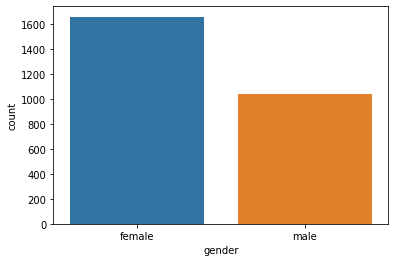

In [143]:
sns.countplot(data = meta_train, x = 'gender')

In [144]:
meta_train.race.value_counts() # 무의미한 데이터같다

Asian    2700
Name: race, dtype: int64

In [145]:
meta_train.age

0       45
1       52
2       54
3       58
4       59
        ..
2695    19
2696    19
2697    19
2698    20
2699    19
Name: age, Length: 2700, dtype: int64

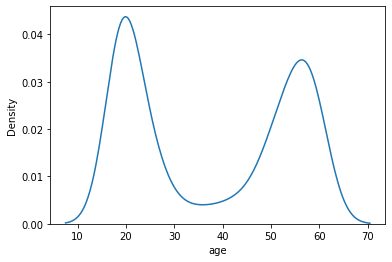

In [146]:
sns.kdeplot(meta_train.age)

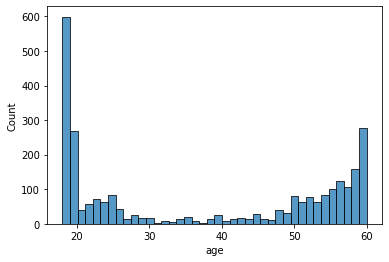

In [147]:
sns.histplot(data = meta_train, x = "age", bins = 40)

데이터가 30~40대는 거의 없음
상당히 불균형해보임

In [148]:
def age_pre(x):
  if x < 30:
    return 0
  elif 30 <= x < 60:
    return 1
  elif x >= 60:
    return 2
meta_train['age_group'] = meta_train['age'].apply(age_pre)

여자 나이

In [149]:
female = meta_train.query("gender == 'female'")

In [150]:
female['age'].describe()

count    1658.000000
mean       38.528347
std        16.888379
min        18.000000
25%        20.000000
50%        44.000000
75%        55.000000
max        60.000000
Name: age, dtype: float64

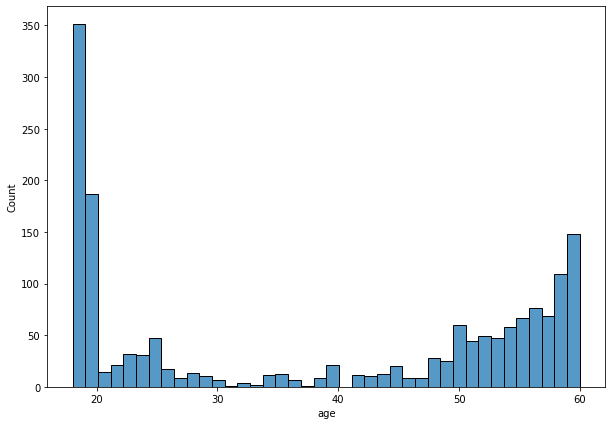

In [154]:
# 여자 나이 분포
plt.figure(figsize = (10, 7))
sns.histplot(data = female, x = 'age', bins = 40)

남자 나이

In [155]:
male = meta_train.query("gender == 'male'")

In [156]:
male['age'].describe()

count    1042.000000
mean       36.403071
std        17.066934
min        18.000000
25%        20.000000
50%        26.000000
75%        56.000000
max        60.000000
Name: age, dtype: float64

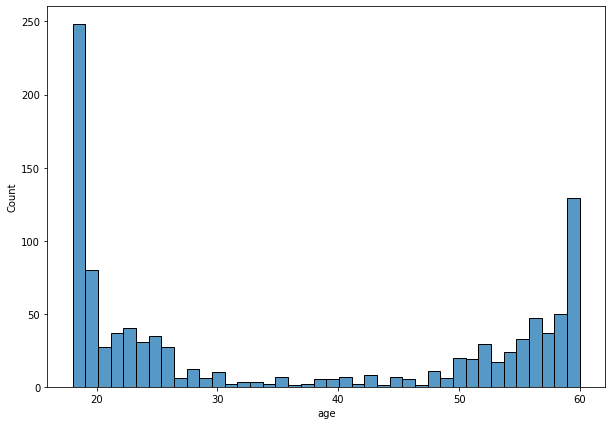

In [157]:
# 남자 나이 분포
plt.figure(figsize = (10,7))
sns.histplot(data = male, x = 'age', bins = 40)

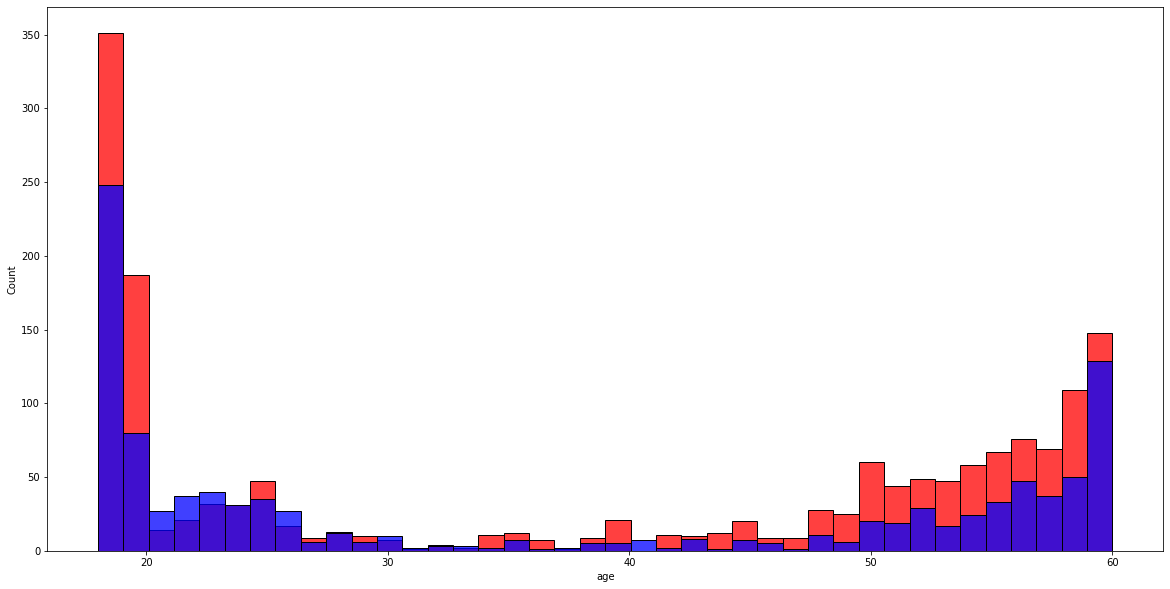

In [159]:
plt.figure(figsize = (20, 10))
sns.histplot(data = female, x = 'age', bins = 40, color = 'r')
sns.histplot(data = male, x = 'age', bins = 40, color = 'b')

여자나이와 남자나이의 분포상의 차이는 별로 없어보임

나이그룹

In [175]:
print(meta_train.age_group.value_counts())
print(meta_train.age_group.value_counts() / meta_train.age_group.value_counts().values.sum())

0    1281
1    1227
2     192
Name: age_group, dtype: int64
0    0.474444
1    0.454444
2    0.071111
Name: age_group, dtype: float64


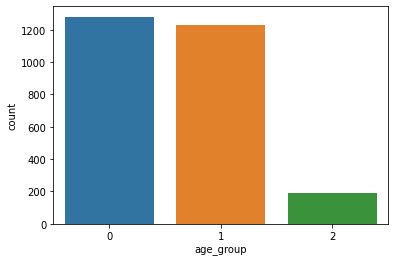

In [161]:
sns.countplot(x = "age_group", data = meta_train)

In [172]:
female.age_group.value_counts() / female.age_group.value_counts().values.sum()

1    0.492762
0    0.441496
2    0.065742
Name: age_group, dtype: float64

In [173]:
male.age_group.value_counts() / male.age_group.value_counts().values.sum()

0    0.526871
1    0.393474
2    0.079655
Name: age_group, dtype: float64

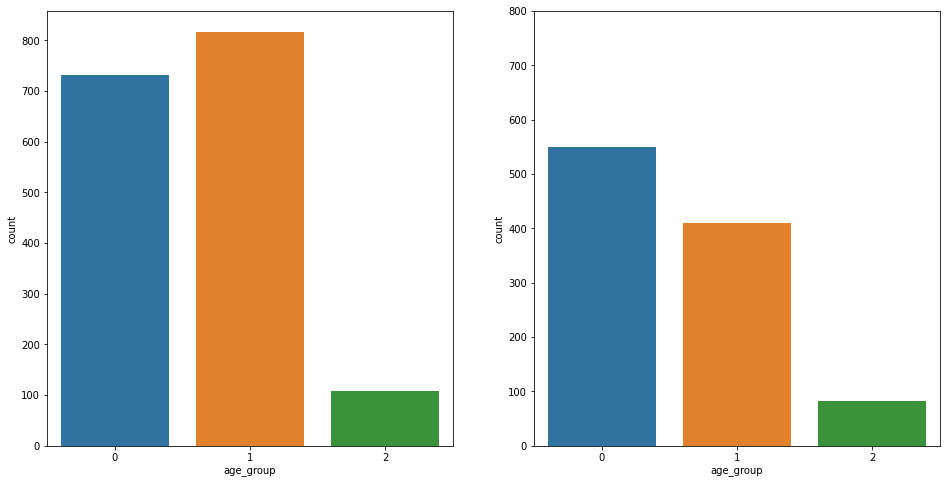

In [168]:
plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
sns.countplot(x = 'age_group', data = female)
plt.yticks(ticks = [0, 100, 200, 300, 400, 500, 600, 700, 800])
plt.subplot(1, 2, 2)
sns.countplot(x = 'age_group', data = male)
plt.yticks(ticks = [0, 100, 200, 300, 400, 500, 600, 700, 800])
plt.show()

클래스별로 나누어 살펴보면 여자와 남자의 분포차이가 보임 
여자는 30~60의 분포가 압도적으로 많지만, 남자는 30 미만이 많음

In [186]:
cd images

/content/drive/My Drive/Colab Notebooks/workspace/ai tech/image classification/data/train/images


In [352]:
cd ..


/content/drive/My Drive/Colab Notebooks/workspace/ai tech/image classification/data


In [351]:
#rm -rf classes

In [356]:
%mkdir classes
%cd classes
%mkdir class0 class1 class2 class3 class4 class5 class6 class7 class8 class9 class10 class11 class12 class13 class14 class15 class16 class17

/content/drive/My Drive/Colab Notebooks/workspace/ai tech/image classification/data/train/classes


In [357]:
ls

class0/   class11/  class14/  class17/  class4/  class7/
class1/   class12/  class15/  class2/   class5/  class8/
class10/  class13/  class16/  class3/   class6/  class9/


In [358]:
cd ..

/content/drive/MyDrive/Colab Notebooks/workspace/ai tech/image classification/data/train


In [359]:
def div_class(dir):
  gender = dir.split("/")[2].split("_")[1]
  age = int(dir.split("/")[2].split("_")[3])
  if "mask1" in dir or "mask2" in dir or "mask3" in dir or "mask4" in dir or "mask5" in dir:
    if gender == "male":
      if age < 30:
        return 0
      elif 30 <= age < 60:
        return 1
      elif age >= 60:
        return 2
    elif gender == "female":
      if age < 30:
        return 3
      elif 30 <= age < 60:
        return 4
      elif age >= 60:
        return 5
  elif "incorrect" in dir:
    if gender == "male":
      if age < 30:
        return 6
      elif 30 <= age < 60:
        return 7
      elif age >= 60:
        return 8
    elif gender == "female":
      if age < 30:
        return 9
      elif 30 <= age < 60:
        return 10
      elif age >= 60:
        return 11
  elif "normal" in dir:
    if gender == "male":
      if age < 30:
        return 12
      elif 30 <= age < 60:
        return 13
      elif age >= 60:
        return 14
    elif gender == "female":
      if age < 30:
        return 15
      elif 30 <= age < 60:
        return 16
      elif age >= 60:
        return 17

In [362]:
dir_list = os.listdir("./images")
dir_list = [dir for dir in dir_list if "._" not in dir]

total_lst = []
for dir in dir_list:
  new_dir = "./images" + "/" + dir
  person_dir = os.listdir(new_dir)
  person_dir = [dir for dir in person_dir if "._" not in dir] # jpg, jpeg, png
  for p_d in person_dir:
    old_p_dir = new_dir + "/" + p_d
    c = div_class(old_p_dir)
    new_p_dir = old_p_dir.split("/")[2] + "_" + p_d
    if c == 0:
      shutil.copy(old_p_dir, "./classes/class0/" + new_p_dir)
    elif c == 1:
      shutil.copy(old_p_dir, "./classes/class1/" + new_p_dir)
    elif c == 2:
      shutil.copy(old_p_dir, "./classes/class2/" + new_p_dir)
    elif c == 3:
      shutil.copy(old_p_dir, "./classes/class3/" + new_p_dir)
    elif c == 4:
      shutil.copy(old_p_dir, "./classes/class4/" + new_p_dir)
    elif c == 5:
      shutil.copy(old_p_dir, "./classes/class5/" + new_p_dir)
    elif c == 6:
      shutil.copy(old_p_dir, "./classes/class6/" + new_p_dir)
    elif c == 7:
      shutil.copy(old_p_dir, "./classes/class7/" + new_p_dir)
    elif c == 8:
      shutil.copy(old_p_dir, "./classes/class8/" + new_p_dir)
    elif c == 9:
      shutil.copy(old_p_dir, "./classes/class9/" + new_p_dir)
    elif c == 10:
      shutil.copy(old_p_dir, "./classes/class10/" + new_p_dir)
    elif c == 11:
      shutil.copy(old_p_dir, "./classes/class11/" + new_p_dir)
    elif c == 12:
      shutil.copy(old_p_dir, "./classes/class12/" + new_p_dir)
    elif c == 13:
      shutil.copy(old_p_dir, "./classes/class13/" + new_p_dir)
    elif c == 14:
      shutil.copy(old_p_dir, "./classes/class14/" + new_p_dir)
    elif c == 15:
      shutil.copy(old_p_dir, "./classes/class15/" + new_p_dir)
    elif c == 16:
      shutil.copy(old_p_dir, "./classes/class16/" + new_p_dir)
    elif c == 17:
      shutil.copy(old_p_dir, "./classes/class17/" + new_p_dir)

In [376]:
lst = []
for i in range(18):
  dir = os.listdir("./classes/class%s"%i)
  lst.append(len(dir))

In [377]:
sum(lst)

18900

In [391]:
for i in range(18):
  dir = os.listdir("./classes/class%s"%i)
  dir = np.random.choice(dir, 4)
  plt.figure(figsize = (36, 9))
  plt.subplot(1, 4, 1)
  dir1 = "./classes/class%s"%i + "/" + dir[0]
  plt.imshow(Image.open(dir1))
  plt.subplot(1, 4, 2)
  dir2 = "./classes/class%s"%i + "/" + dir[1]
  plt.imshow(Image.open(dir2))
  plt.subplot(1, 4, 3)
  dir3 = "./classes/class%s"%i + "/" + dir[2]
  plt.imshow(Image.open(dir3))
  plt.subplot(1, 4, 4)
  dir4 = "./classes/class%s"%i + "/" + dir[3]
  plt.imshow(Image.open(dir4))

Output hidden; open in https://colab.research.google.com to view.